In [483]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
lotus_train = pd.read_pickle("C:\\Users\\OnePredict\\Desktop\\SEMES_work\\lotus_211111-2_all-train-test-dataset\\lotus_train_df.pkl")
lotus_test = pd.read_pickle("C:\\Users\\OnePredict\\Desktop\\SEMES_work\\lotus_211111-2_all-train-test-dataset\\lotus_test_df.pkl")

### Linear Regression 구현 (Gradient descent 이용) 

In [479]:
def predict(m, c, x_i):
    return m * x_i + c
    ## yi,pred = m*xi + c

def error(m, c, x_i, y_i):
    return y_i - predict(m, c, x_i)
    ## error = yi - yi,pred

# def MSE(m, c, x, y):
#     return sum(error(m,c,x_i,y_i)**2 for x_i,y_i in zip(x,y))/len(x)
#     ## sum_error = sigma(yi - yi,pred)^2

def squared_error_gradient(m,c,x_i, y_i):
    return [-2 * error(m,c, x_i, y_i) * x_i,  # alpha partial derivative(Dm)
            -2 * error(m,c, x_i, y_i)]        # beta partial derivative(Dc) 
        
def derivation(X,y):
    D = []
    for i in range(len(X)):
        D.append((y[i]-y[i-1])/(X[i]-X[i-1]))
        return D

In [485]:
y = (np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5))
X = np.array([i for i in range(1,len(y)+1)])
D = []
for i in range(len(X)):
    D.append((y[i]-y[i-1])/(X[i]-X[i-1]))


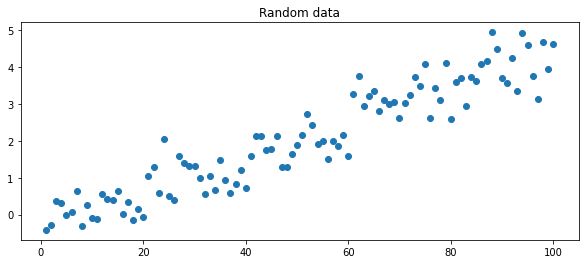

In [490]:
plt.figure(figsize=[10,4])
plt.scatter(X,y)
plt.title("Random data")
plt.show()

### 사용할 X, y 값 random으로 형성
#### 1개의 데이터에 대한 linear regression

In [507]:
np.random.seed(42)
y = (np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)).reshape(100,) #(100,)
X = np.array([i for i in range(1,len(y)+1)]).reshape(100,1) #(100,)
# X.reshape(100,1)
# y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [509]:
m,n = X.shape

In [641]:
## vector 로 구현한 linear regression

X = 2 * np.random.rand(100,2) # 100,1
y = 4 +3 * X+np.random.randn(100,1) # 100,1

theta = np.random.randn(2,1) #TODO theta의 값을 X 의 n 차원에 맞게 임의로 생성해줬지만, 어떻게 해줘야할지 모르겠음.


m = len(y)
predict = X.dot(theta)
cost = (1/2*m)*sum((predict-y)**2)

## gradient descent 
learning_rate = 0.01
iterations = 10000000 #TODO 자동으로 최적값을 찾아줄수있게 바꿔야함 

cost_history = np.zeros(iterations)
theta_history = np.zeros((iterations,2))

for i in range(iterations):
    predict = np.dot(X,theta)
    theta = theta - (1/m)*learning_rate*(X.T.dot((predict-y)))

## y_pred = theta1*X + theta0
theta1 = theta.T[1][0] # Theta 1 
theta0 = theta.T[0][0] # Theta 0 

y_pred = theta1*X + theta0

### 예측값과 실제값 비교 

0.6462713974523603


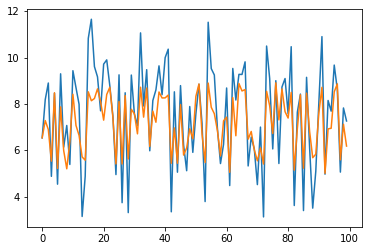

In [642]:
plt.plot(y[:,0])
plt.plot(y_pred[:,0])

y_bar = sum(y)/len(y)
SST = sum((y-y_bar)**2)
SSR = sum((y-y_pred)**2)
R_squre = 1 - SSR/SST

print(R_squre[0])

In [638]:
sum(y)/len(y)

array([7.14208008, 7.0337357 ])

In [609]:
cost_history = np.zeros(iterations)
theta_history = np.zeros((iterations,2))
theta_history

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

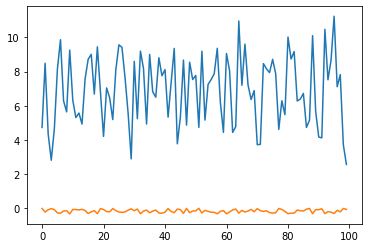

In [551]:
plt.plot(y)
plt.plot(predict)
# plt.plot(X)

TypeError: only size-1 arrays can be converted to Python scalars

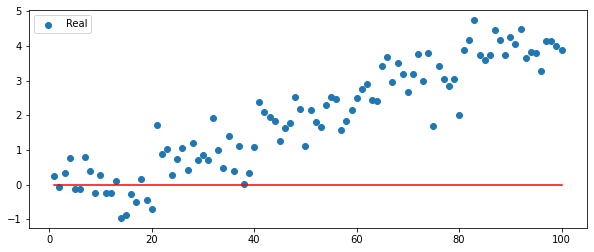

In [511]:
## Linear Regression test 

# initial value 
color = ['red','blue','gray', 'green']
a = 0.1 # learning rate
c = 0
w  = 0
epochs =1

## R score
y_bar = sum(y)/len(y)
y_pred = w*X + c
SST = sum((y-y_bar)**2) # Total sum of squares
SSR = sum((y-y_pred)**2) # Regression Sum of squares
R_squre = 1 - SSR/SST
# SSE : explained sum of squares [sigma(y_pred - y_bar)^2]


plt.figure(figsize=[10,4])
plt.scatter(X,y, label="Real")
plt.legend(loc = "upper left")
# plt.scatter(X, predict(m,c,X),  label="")
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color ="red")


for i in range(epochs):
    for j in range(len(X)):
        D.append((y[j]-y[j-1])/(X[j]-X[j-1]))
        
    Dm = -2*(y-y_pred)*X
    w = w - a*Dm/n
    c = c - a*Dc/n
    print("R2 score:%.2f"%R_squre)
    plt.scatter(X, predict(w,c,X),label= f'depth{i}', lw=3, alpha=0.4)
    plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color ="red")
    plt.legend(loc="upper left")


In [480]:
derivation(X,y)
# (y[2]-y[1])/(X[2]-X[1])

[0.036710599563705155]

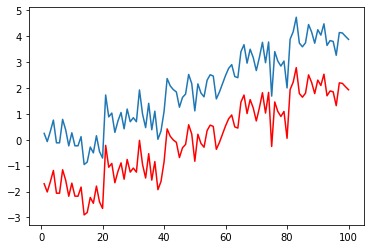

In [476]:
plt.plot(X,y)
plt.plot(X,y-y_bar, color = "red")
# plt.plot(X,y_bar)

In [477]:
Dm = -2*(y-y_pred).dot(X)
Dm

-27791.668420576687

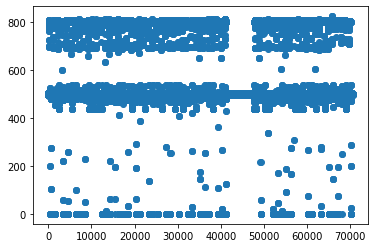

In [352]:
X = lotus_train.index
y = lotus_train["esu_CHM_DSP300_FLOW"]
plt.scatter(X,y)

In [ ]:
## Linear Regression test 

# initial value 
color = ['red','blue','gray', 'green']
a = 1 # learning rate
c = 0
w  = 0
epochs = 5

## R score
y_bar = sum(y)/len(y)
SST = sum((y-y_bar)**2)
SSR = sum((y-predict(w,c,X))**2)
R_squre = 1 - SSR/SST

n = X.shape[0]
plt.figure(figsize=[10,4])
plt.scatter(X,y, label="Real")
plt.legend(loc = "upper left")
# plt.scatter(X, predict(m,c,X),  label="")
for i in range(epochs):
    Dm,Dc = squared_error_gradient(w,c,X,y)
    w = w - a*Dm/n
    c = c - a*Dc/n
    print("R2 score:%.2f"%R_squre)

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=X, y=predict(w,c,X)))
# fig.update_layout(title="linear regression")
# fig.show()
plt.scatter(X, predict(w,c,X),label= f'depth{i}', lw=3, alpha=0.4)
plt.legend(loc="upper left")
print(w,c)

In [380]:
y_pred = w*X + c

fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=y_pred))
# plt.plot(X,y)
# plt.plot(X,y_pred, color="red")
# plt.show()
fig.show()

In [216]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
a.dot(b) # 5, 12,21,32 = 70 

70

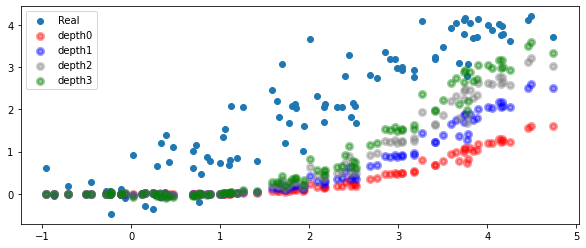

In [314]:
## Lasso Regression test 


# initial value 
color = ['red','blue','gray', 'green']
a = 1 # learning rate
c = 0
m  = 0

n = X.shape[0]
plt.figure(figsize=[10,4])
plt.scatter(X,y, label="Real")
plt.legend(loc = "upper left")
# plt.scatter(X, predict(m,c,X),  label="")
for i in range(4):
    Dm,Dc = squared_error_gradient(m,c,X,y)
    m = m - a*Dm/n
    c = c + a*Dc/n

    plt.scatter(X, predict(m,c,X), color=color[i],label= f'depth{i}', lw=3, alpha=0.4)
    plt.legend(loc="upper left")

lam = 0.1 
w = np.zeros(X.shape[0])



### Copy code

In [ ]:
# Function that gets prediction from matrix and Weights
def getPred(x,W):
    return(np.matmul(x,W))
# The basic loss, sum over the difference of y-ypred
def Loss(y,ypred):
    l=(y-ypred)**2
    return(l.sum())
#The Mean Square Error.
def MSE(X,Y,W):
    return((1/X.shape[0])*Loss(Y,getPred(X,W)))

In [ ]:
#This function computes the weights seen in Figure 9.
def GradDesc(X,Y,learnRate=0.01,epochs=2000,reg=0):
    
    global cacheLoss
    cacheLoss=[None]*epochs
    
   # Random Initialization of Weights
    Weights=np.random.rand(X.shape[1])
    
    Weights=np.array(Weights)
    Weights=Weights.reshape(-1,1)
    m=X.shape[0]
    
    for i in range(epochs):
        
        predictions=getPred(X,Weights)
        cacheLoss[i]=Loss(Y,predictions)
        
        Weights[0]=Weights[0]-(1/m)*learnRate*(np.matmul(X[:,0].transpose(),predictions-Y))
        
        for j in range(1,len(Weights)):
            
            Weights[j]=Weights[j]-(1/m)*learnRate*(np.matmul(X[:,j].transpose(),predictions-Y)+sum(np.dot(Weights[j],reg)))
    return(Weights)

In [275]:
lotus_train_float = [i for i in lotus_train.columns if lotus_train[i].dtypes != "float"]
lotus_train_zero = [i for i in lotus_train.drop(lotus_train_float,axis=1).columns if lotus_train[i].sum() != 0]

lotus_train[lotus_train_zero].head()

,esu_PROC_RCP_STEP,esu_RPM,esu_Bowl_Exh_R,esu_MRNozzle_SCANCOUNT,esu_Chuck_Bowl_Sh1_FLOW,esu_BACK_DI_FLOW,esu_BACK_N2_FLOW,esu_BACK_HOTDI_FLOW,esu_BACKSIDE_CAP_N2_FLOW,esu_FINAL_DIW_FLOW,...,tank10_SetFlowOfH2O2,tank10_SetFlowOfCDIW,tank10_CurFlowOfACT,tank10_CurFlowOfH2O2,tank10_CurFlowOfCDIW,tank10_FlowOfACT,tank10_FlowOfH2O2,tank10_FlowOfCDIW,tank10_ACT_IN_PRESS,tank10_H2O2_IN_PRESS
0,0.0,0.0,199.0,0.0,0.0,0.0,0.0,500.0,145.0,0.0,...,3009.0,1305.0,487.0,3012.0,1329.0,0.0,0.0,0.0,105.0,127.0
1,0.0,0.0,199.0,0.0,0.0,0.0,0.0,500.0,145.0,0.0,...,3009.0,1305.0,487.0,3012.0,1329.0,0.0,0.0,0.0,105.0,127.1
2,0.0,0.0,199.0,0.0,0.0,0.0,0.0,500.0,145.0,0.0,...,3009.0,1305.0,487.0,3012.0,1329.0,0.0,0.0,0.0,105.0,127.2
3,0.0,0.0,199.0,0.0,0.0,0.0,0.0,500.0,145.0,0.0,...,3009.0,1305.0,487.0,3012.0,1329.0,0.0,0.0,0.0,105.0,127.3
4,0.0,0.0,199.0,0.0,0.0,0.0,0.0,500.0,145.0,0.0,...,3009.0,1305.0,487.0,3012.0,1329.0,0.0,0.0,0.0,105.0,127.4


In [201]:
#Importing libraries
  
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Lasso Regression
  
# epoch : 모든 train dataset을 한번 돌아 학습 시킨 것을 의미
# batch size : 한번에 순방향/역방향 패스에 넣는 사례의 계수. 1회의 epoch를 돌릴때, 모든 데이터셋을 한번에 메모리에 올릴 수 없으므로(특히, 도메인이 이미지인 경우)
#              전체 데이터셋을 몇 등분으로 잘라서 차례대로 메모리에 올림. --> batch size가 클수록 메모리 요구량이 증가함
# number of iterations : 1 epoch 당 돌아야하는 배치의 개수 
#### 전체 데이터가 1000개 있고, 배치 사이즈가 500개면, 1 epoch를 돌기 위해서는 2번의 배치를 돌아야함. 

class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
        self.iterations = iterations          
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape          
        
     
      
    # Helper function to update weights in gradient descent
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :

            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
         
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b
      
  
# def main() :
      
#     # Importing dataset
      
#     df = pd.read_csv( "salary_data.csv" )
  
#     X = df.iloc[:, :-1].values
  
#     Y = df.iloc[:, 1].values
      
#     # Splitting dataset into train and test set
  
#     X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1 / 3, random_state = 0 )
      
#     # Model training
      
#     model = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
  
#     model.fit( X_train, Y_train )
      
#     # Prediction on test set
  
#     Y_pred = model.predict( X_test )
      
#     print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
      
#     print( "Real values      ", Y_test[:3] )
      
#     print( "Trained W        ", round( model.W[0], 2 ) )
      
#     print( "Trained b        ", round( model.b, 2 ) )
      
#     # Visualization on test set 
      
#     plt.scatter( X_test, Y_test, color = 'blue' )
      
#     plt.plot( X_test, Y_pred, color = 'orange' )
      
#     plt.title( 'Salary vs Experience' )
      
#     plt.xlabel( 'Years of Experience' )
      
#     plt.ylabel( 'Salary' )
      
#     plt.show()
      
  
# if __name__ == "__main__" : 
      
#     main()

In [206]:
model = LassoRegression(iterations=10, learning_rate=0.01, l1_penality=500)

In [209]:
y[:40]

array([-0.35384269, -0.10516133, -0.08567863, -0.20056932, -0.04032143,
        0.10101271,  0.47154648,  0.04364445,  0.0643876 , -0.01861148,
       -0.4796928 , -0.00662847,  0.01505755,  0.61581053, -0.04809024,
        0.07538684, -0.00867794, -0.29216951,  0.2857057 ,  0.18798326,
        1.19775799,  0.77265314,  1.35069858,  0.64953723,  1.14671427,
        1.54761391,  0.75236592,  0.85842557,  1.02491284,  0.87413109,
        0.61233414,  1.01714074,  0.73442407,  1.11839811,  0.77014394,
        1.3874836 ,  0.80418668,  0.91948462,  1.2033793 ,  0.69228392])

In [210]:
model.fit(X[:40],y[:40])

ValueError: not enough values to unpack (expected 2, got 1)

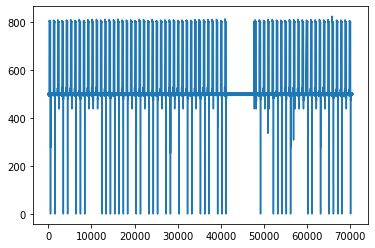

In [110]:
plt.plot(lotus_train["esu_CHM_DSP300_FLOW"])

In [ ]:
y = lotus_train["esu_CHM_DSP300_FLOW"]
x = 

squared_error_gradient(x_i, y_i, alpha, beta)

In [99]:
# c = c-alpha(Dc)
# m = m-alpha(Dm)
## make Linear regression model 
a = 0.1 # learning rate
c=0 
m=0

# y_i = mx_i + c

y = lotus_train["esu_CHM_DSP300_FLOW"]

x = lotus_train['esu_CHM_DSP300_FLOW_DispenseState']
## Gradient Descent

for x in lotus_train['esu_PROC_RCP_STEP']:
    y_pred = m*x + c
    Dm = (-2/50)*sum(x*(y-y_pred))
    Dc = (-2/50)*sum(y-y_pred)

    m = m-a(Dm)
    c = c-a(Dc)
print(m,c)



TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [92]:
[x for x in lotus_train['esu_Bowl_Exh_R']]

[199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 202.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 202.0,
 202.0,
 199.0,
 199.0,
 199.0,
 199.0,
 202.0,
 202.0,
 202.0,
 202.0,
 202.0,
 202.0,
 202.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 202.0,
 202.0,
 202.0,
 202.0,
 202.0,
 202.0,
 199.0,
 199.0,
 199.0,
 202.0,
 202.0,
 199.0,
 199.0,
 202.0,
 202.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 198.0,
 198.0,
 198.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 199.0,
 196.0,
 190.0,
 192.0,
 192.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 187.0,
 187.0,
 187.0,
 187.0,
 186.0,
 184.0,
 184.0,
 184.0,
 184.0,
 181.0,
 181.0,
 181.0,
 179.0,


In [61]:
len(features[target == 1, 0])

50

In [7]:
[i for i in lotus_train if "DSP" in i]

['esu_CHM_DSP300_FLOW',
 'esu_BACK_DSP300_FLOW',
 'esu_CHM_DSP300_FLOW_TargetFlow',
 'esu_CHM_DSP300_FLOW_CtrlValue',
 'esu_BACK_DSP300_FLOW_TargetFlow',
 'esu_BACK_DSP300_FLOW_CtrlValue',
 'esu_CHM_DSP300_FLOW_DispenseState',
 'esu_BACK_DSP300_FLOW_DispenseState',
 'esu_CHM_DSP300_APAC_Sensor_Data',
 'esu_CHM_DSP300_APAC_Current',
 'esu_BACK_DSP300_APAC_Sensor_Data',
 'esu_BACK_DSP300_APAC_Current',
 'mainio_CHEM3_DSP300',
 'tank4_RateOfDSP',
 'tank4_PressOfDSPHFTankPN2',
 'tank4_SetFlowOfDSP',
 'tank4_CurFlowOfDSP',
 'tank4_FlowOfDSP',
 'tank4_DSP_IN_PRESS']

In [17]:
predict_list = []
for i in lotus_train["esu_CHM_DSP300_FLOW_TargetFlow"]:
    predict_list.append(predict(1,1,i))

In [18]:
predict_list[1:50]

[501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0,
 501.0]

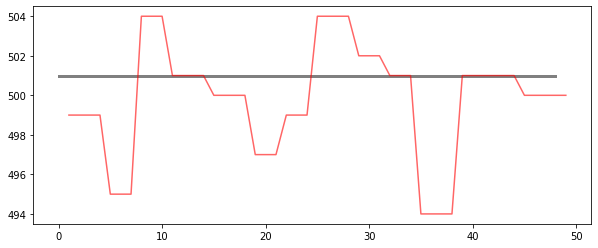

In [19]:

# plt.plot(lotus_train["esu_CHM_DSP300_FLOW"])
plt.figure(figsize=[10,4])
plt.plot(predict_list[1:50],color='gray',label='esu_CHM_DSP300_FLOW', lw=3)
plt.plot(lotus_train["esu_CHM_DSP300_FLOW"][1:50], color='red', label='esu_CHM_DSP300_FLOW_DispenseState', alpha=0.6)



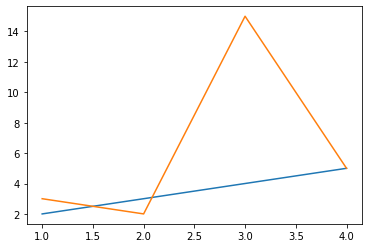

In [38]:
plt.plot(x, predict_list)
plt.plot(x,y)

In [30]:
x = [1,2,3,4]
y = [3,2,15,5]

for pair in zip(x,y):
    print(pair)

(1, 3)
(2, 2)
(3, 15)
(4, 5)
